In [121]:
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [3]:
# This option ensures that the graphs we create are displayed within the notebook without the need to "call" them specifically.
%matplotlib inline

In [5]:
path = r'C:\Users\BaratSakhizada\Desktop\data analytics\Assignments\Achievement 6\02 Data\Prepared Data'

In [7]:
df_house = pd.read_pickle(os.path.join(path, 'Ex 6.1 house_cleaned.pickle'))

In [9]:
df_house.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15', 'apartment_grade',
       'house_view', 'house_condition', 'year_sold', 'month_sold'],
      dtype='object')

In [98]:
pd.options.display.max_columns=None

In [100]:
pd.options.display.max_rows=None

In [17]:
df_house.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,apartment_grade,house_view,house_condition,year_sold,month_sold
0,7129300520,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650,Average_Construction_Design,No_View,Average,2014,10
1,6414100192,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639,Average_Construction_Design,No_View,Average,2014,12
2,5631500400,2015-02-25,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062,Average_Construction_Design,No_View,Average,2015,2
3,2487200875,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000,Average_Construction_Design,No_View,Very Good,2014,12
4,1954400510,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503,High_Construction_Design,No_View,Average,2015,2


### creating scatter plot and regplot for columns we want to apply regression

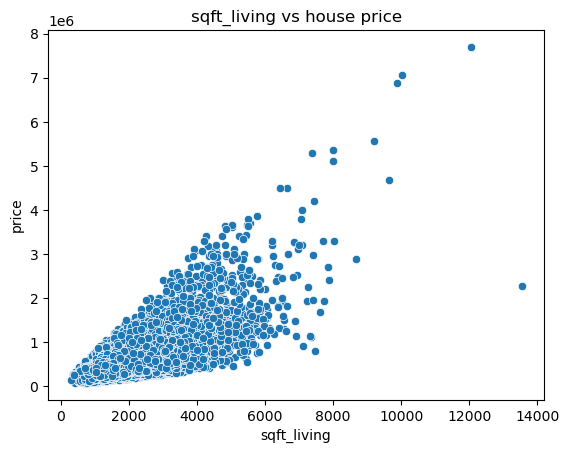

In [123]:
# Create a scatterplot for the 'sqft_living' and 'price' columns in seaborn
sns.scatterplot(x = 'sqft_living', y = 'price', data = df_house)
plt.title('sqft_living vs house price')
plt.show()

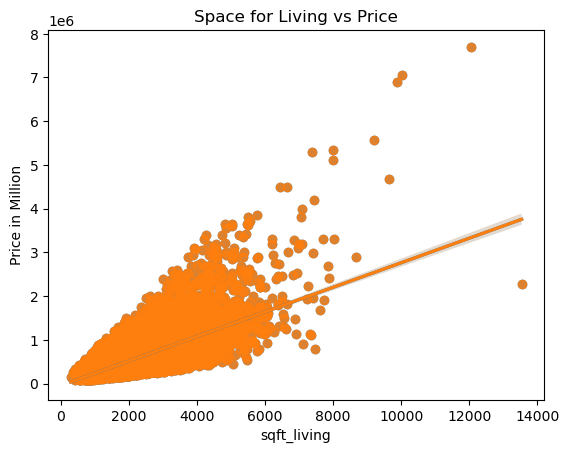

In [51]:
# Scatter plot with a regression line
sns.regplot(x='sqft_living', y='price', data=df_house)
plt.ylabel('Price in Million')
plt.title('Space for Living vs Price')
plt.show()

### checking distribution of sqft_living and price on a histogram

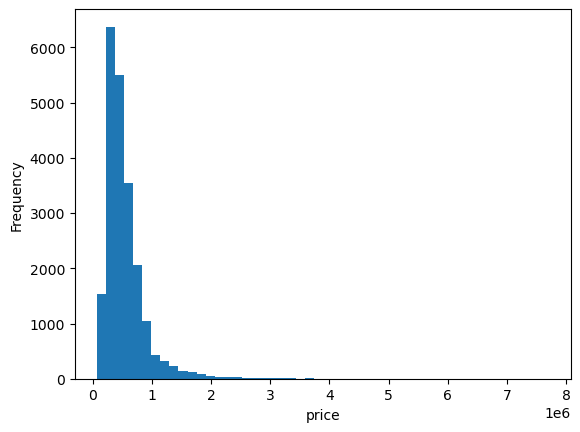

In [37]:
df_house['price'].plot.hist(bins =50)
plt.xlabel('price')
plt.show()

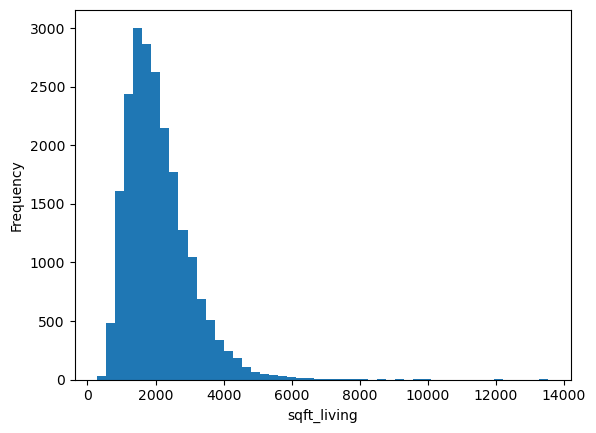

In [39]:
df_house['sqft_living'].plot.hist(bins =50)
plt.xlabel('sqft_living')
plt.show()

### Hypothesis
### With the increase in space for living, price of houses also increases

### preparing the data for regression

In [55]:
# Reshape the variables into NumPy arrays and put them into separate objects.
X = df_house['sqft_living'].values.reshape(-1,1)
y = df_house['price'].values.reshape(-1,1)

In [102]:
X

array([[1180],
       [2570],
       [ 770],
       ...,
       [1020],
       [1600],
       [1020]], dtype=int64)

In [104]:
y

array([[221900.],
       [538000.],
       [180000.],
       ...,
       [402101.],
       [400000.],
       [325000.]])

In [77]:
# Split data into a training set and a test set.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

### Simple Linear Regression Analysis 

In [82]:
# Create a regression object.
regression = LinearRegression()  # This is the regression object, which will be fit onto the training set.

In [84]:
# Fit the regression object onto the training set.
regression.fit(X_train, y_train)

LinearRegression()

In [86]:
# Predict the values of y using X_test.
y_predicted = regression.predict(X_test)

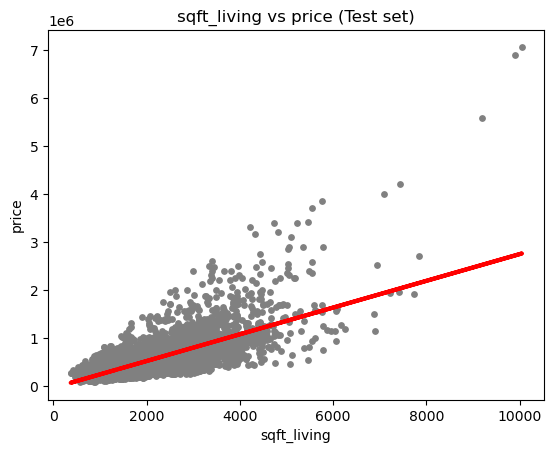

In [90]:
# Create a plot that shows the regression line from the model on the test set.
plot_test = plt
plot_test.scatter(X_test, y_test, color='gray', s = 15)
plot_test.plot(X_test, y_predicted, color='red', linewidth =3)
plot_test.title('sqft_living vs price (Test set)')
plot_test.xlabel('sqft_living')
plot_test.ylabel('price')
plot_test.show()

In [92]:
# Create objects that contain the model summary statistics.
rmse = mean_squared_error(y_test, y_predicted) # This is the mean squared error
r2 = r2_score(y_test, y_predicted) # This is the R2 score. 

In [94]:
# Print the model summary statistics. This is where we evaluate the performance of the model.
print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[278.32860644]]
Mean squared error:  70170013932.11592
R2 score:  0.48889929019453016


As per the Slope, for each additional square foot of living space, the price of the house increases by $278.33 on average. This suggests a positive relationship between house size and price meaning that larger homes tend to be more expensive.

The mean squared error (MSE) measures the average squared difference between the actual and predicted values. It gives a sense of how well the model is performing, with lower values indicating better performance. In this case, the MSE is approximately 70.17 billion wit the square root of approximately 264,896. The high MSE is high and it indicates that there’s still room to improve the model, possibly by introducing more relevant features such as location, number of bedrooms etc.

The R2 score of 0.488 means that our model explains 49% of the variance in house prices based on the square footage of the living space. It suggests that other factors, besides sqft_living, significantly influence house prices. In other words, 51% of the variation in house prices remains unexplained by regression model.

In [106]:
y_predicted

array([[ 360116.30871034],
       [1261900.99358095],
       [ 362899.59477476],
       ...,
       [ 560512.90534826],
       [ 374032.73903242],
       [ 329500.16200177]])

In [119]:
# Create a dataframe comparing the actual and predicted values of y.

data = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_predicted.flatten()})
# Set option to suppress scientific notation
pd.set_option('display.float_format', '{:.2f}'.format)
data.head(30)

,Actual,Predicted
0,297000.00,360116.31
1,1578000.00,1261900.99
2,562100.00,362899.59
3,631500.00,276617.73
4,780000.00,847191.37
5,485000.00,421348.60
6,340000.00,440831.60
7,335606.00,668504.40
8,425000.00,646794.77
9,490000.00,1203451.99


#### Compare how the regression fits the training set

As we can see mannually, the difference between actual and predicted figures are big and it suggest that the module still need to be improved a lot. From the results of our linear regression model, we can confirm that our hypothesis—the larger the living space, the higher the price of the house—is partially true. The positive slope (278.33) indicates that for every additional square foot of living space, the price increases by approximately $278.33.

However, the R2 score of 0.4945 suggests that this model explains only about 49.45% of the variability in house prices. This means that other factors, apart from the size of the house, significantly influence house prices. Additional variables such as location, number of bedrooms, house condition, and amenities could provide a more complete picture of what determines house prices.